6.4 Machine Learning

This script contains the following:

1. Importing libraries and data

2. Data cleaning

3. Data prep for regression analysis

4. Regression analysis

Bonus: performance improvement after removing outliers

1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/bridget/Downloads/Avocado Analysis 2023'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'avocado_new.csv'))

2. Data Cleaning

In [5]:
df.head()

,Unnamed: 0,Unnamed,Date,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,type,year,region
0,0,0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2,2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,3,3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,4,4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [6]:
df.shape

(27321, 15)

In [7]:
# Check for missing values
df.isnull().sum()

Unnamed: 0      0
Unnamed         0
Date            0
AveragePrice    0
Total Volume    0
Small/Medium    0
Large           0
XLarge          0
Total Bags      0
Small Bags      0
Large.1         0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

/Users/bridget/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

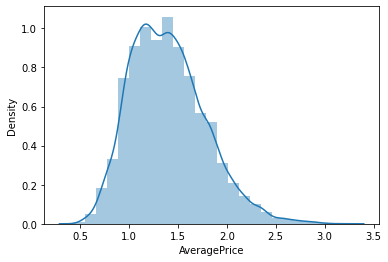

In [8]:
# Check for extreme values
sns.distplot(df['AveragePrice'],bins = 25, kde = True)

In [9]:
# Check Mean
df['AveragePrice'].mean()

1.4006474872808399

In [10]:
# Check median
df['AveragePrice'].median()

1.37

In [11]:
# Check max
df['AveragePrice'].max()

3.25

In [12]:
# Check min
df['AveragePrice'].min()

0.44

In [13]:
df['AveragePrice'].max()-df['AveragePrice'].min()

2.81

In [14]:
df.describe()

,Unnamed: 0,Unnamed,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,year
count,27321.000000,27321.000000,27321.000000,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,27321.000000,27321.00000
mean,13660.000000,13660.013799,1.400647,9.136115e+05,2.953402e+05,2.901264e+05,2.216030e+04,3.058950e+05,2.187128e+05,8.203135e+04,5150.764599,2016.95659
std,7887.037689,7887.061426,0.385449,3.702800e+06,1.273054e+06,1.187268e+06,1.031365e+05,1.274895e+06,8.881601e+05,3.917493e+05,30720.300559,1.40659
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.00000
25%,6830.000000,6830.000000,1.110000,1.360812e+04,7.963700e+02,2.922520e+03,0.000000e+00,7.703330e+03,5.282770e+03,2.775100e+02,0.000000,2016.00000
50%,13660.000000,13660.000000,1.370000,1.198906e+05,1.004165e+04,2.569837e+04,1.928100e+02,4.776093e+04,3.223936e+04,4.313590e+03,0.000000,2017.00000
75%,20490.000000,20490.000000,1.640000,4.747300e+05,1.133227e+05,1.454874e+05,5.898840e+03,1.461028e+05,1.048429e+05,3.269381e+04,450.740000,2018.00000
max,27320.000000,27322.000000,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,8.378356e+06,844929.830000,2019.00000


3. Data Prep for Analysis

# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.


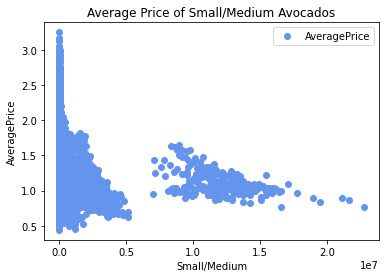

In [18]:
df.plot(x = 'Small/Medium', y='AveragePrice',style='o', color='cornflowerblue') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average Price of Small/Medium Avocados')  
plt.xlabel('Small/Medium')  
plt.ylabel('AveragePrice')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Small/Medium'].values.reshape(-1,1)
y = df['AveragePrice'].values.reshape(-1,1)

In [20]:
X

array([[2819.5 ],
       [1002.85],
       [ 914.14],
       ...,
       [2194.49],
       [1512.45],
       [1478.79]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

4. Regression Analysis

In [22]:
# Create regression object
regression = LinearRegression()

In [23]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

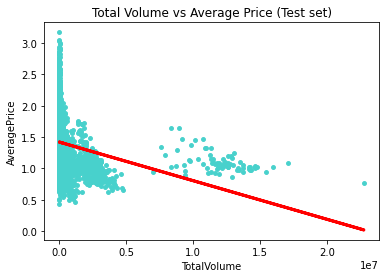

In [26]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='mediumturquoise', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Volume vs Average Price (Test set)')
plot_test.xlabel('TotalVolume')
plot_test.ylabel('AveragePrice')
plot_test.show()

In [27]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.15364509e-08]]
Mean squared error:  0.1436873114472446
R2 score:  0.042622689898977884


In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.35,1.403264
1,1.59,1.417271
2,2.08,1.418811
3,1.23,1.415868
4,1.04,1.402775
5,1.12,1.390526
6,0.96,1.413694
7,1.15,1.418805
8,1.11,1.419144
9,1.60,1.419061


Summary statistics of model indicates inaccuracy.

r2 score of .04 indicates a poor fit. rMSE is 0.14 

slope of -6.15 indicates that as Total Volume decreases, the Average Price increases 

In [30]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.15364509e-08]]
Mean squared error:  0.14170894683791505
R2 score:  0.04194489708058635


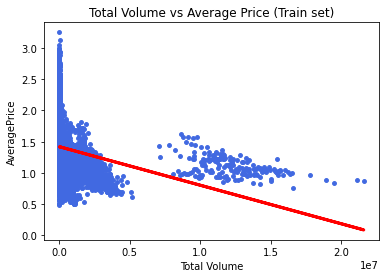

In [36]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='royalblue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Volume vs Average Price (Train set)')
plot_test.xlabel('Total Volume')
plot_test.ylabel('AveragePrice')
plot_test.show()

Regression on df of Total Volume of 1.5 and higher

In [37]:
df2 = df[df['Total Volume']>=1.5]
df2

,Unnamed: 0,Unnamed,Date,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,type,year,region
0,0,0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2,2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,3,3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,4,4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,27316,27318,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.0,organic,2015,WestTexNewMexico
27317,27317,27319,2015-11-29,2.08,4638.10,1395.02,2238.04,61.71,943.33,943.33,0.00,0.0,organic,2015,WestTexNewMexico
27318,27318,27320,2015-12-13,1.80,7836.65,2194.49,2981.01,25.97,2635.18,2598.45,36.73,0.0,organic,2015,WestTexNewMexico
27319,27319,27321,2015-12-20,1.92,6255.19,1512.45,2407.32,11.78,2323.64,2213.72,109.92,0.0,organic,2015,WestTexNewMexico


In [38]:
df2.describe()

,Unnamed: 0,Unnamed,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,year
count,27321.000000,27321.000000,27321.000000,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,2.732100e+04,27321.000000,27321.00000
mean,13660.000000,13660.013799,1.400647,9.136115e+05,2.953402e+05,2.901264e+05,2.216030e+04,3.058950e+05,2.187128e+05,8.203135e+04,5150.764599,2016.95659
std,7887.037689,7887.061426,0.385449,3.702800e+06,1.273054e+06,1.187268e+06,1.031365e+05,1.274895e+06,8.881601e+05,3.917493e+05,30720.300559,1.40659
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.00000
25%,6830.000000,6830.000000,1.110000,1.360812e+04,7.963700e+02,2.922520e+03,0.000000e+00,7.703330e+03,5.282770e+03,2.775100e+02,0.000000,2016.00000
50%,13660.000000,13660.000000,1.370000,1.198906e+05,1.004165e+04,2.569837e+04,1.928100e+02,4.776093e+04,3.223936e+04,4.313590e+03,0.000000,2017.00000
75%,20490.000000,20490.000000,1.640000,4.747300e+05,1.133227e+05,1.454874e+05,5.898840e+03,1.461028e+05,1.048429e+05,3.269381e+04,450.740000,2018.00000
max,27320.000000,27322.000000,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,8.378356e+06,844929.830000,2019.00000


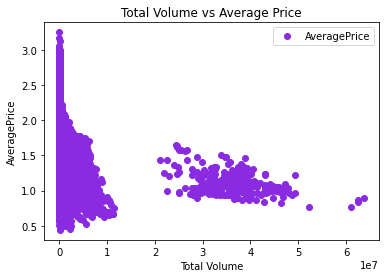

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'Total Volume', y='AveragePrice',style='o', color='blueviolet') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Volume vs Average Price')  
plt.xlabel('Total Volume')  
plt.ylabel('AveragePrice')  
plt.show()

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df2['Total Volume'].values.reshape(-1,1)
y = df2['AveragePrice'].values.reshape(-1,1)

In [42]:
X

array([[40873.28],
       [41195.08],
       [44511.28],
       ...,
       [ 7836.65],
       [ 6255.19],
       [ 7155.63]])

In [43]:
y

array([[1.22],
       [1.24],
       [1.17],
       ...,
       [1.8 ],
       [1.92],
       [1.81]])

In [44]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [45]:
# 4. Regression Analysis

# Create regression object
regression = LinearRegression()

In [46]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

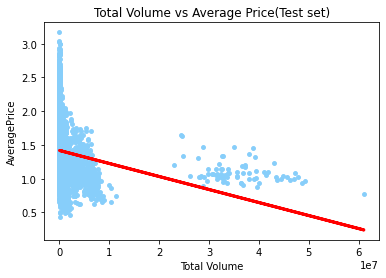

In [48]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='lightskyblue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Volume vs Average Price(Test set)')
plot_test.xlabel('Total Volume')
plot_test.ylabel('AveragePrice')
plot_test.show()

In [49]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.92881397e-08]]
Mean squared error:  0.1448711336980263
R2 score:  0.03473497489703603


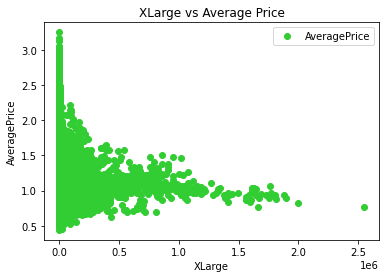

In [54]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'XLarge', y='AveragePrice',style='o', color='limegreen') # The style option creates a scatterplot; without it, we only have lines.
plt.title('XLarge vs Average Price')  
plt.xlabel('XLarge')  
plt.ylabel('AveragePrice')  
plt.show()

In [55]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['XLarge'].values.reshape(-1,1)
y = df['AveragePrice'].values.reshape(-1,1)

In [56]:
X

array([[ 49.9 ],
       [127.12],
       [135.77],
       ...,
       [ 25.97],
       [ 11.78],
       [ 14.1 ]])

In [57]:
# Split data into a training set and a test set.  Using test_train_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =0)

In [58]:
regression.fit(X_train, y_train)

LinearRegression()

In [59]:
y_predicted = regression.predict(X_test)

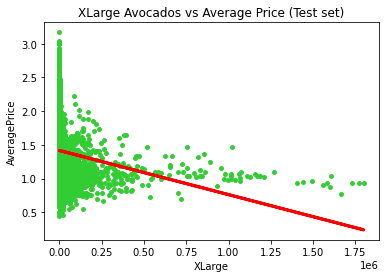

In [60]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='limegreen', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('XLarge Avocados vs Average Price (Test set)')
plot_test.xlabel('XLarge')
plot_test.ylabel('AveragePrice')
plot_test.show()

In [61]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [62]:
# Check summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.54719288e-07]]
Mean squared error:  0.14576861162860108
R2 score:  0.02875514968912829


In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.35,1.403264
1,1.59,1.417271
2,2.08,1.418811
3,1.23,1.415868
4,1.04,1.402775
5,1.12,1.390526
6,0.96,1.413694
7,1.15,1.418805
8,1.11,1.419144
9,1.60,1.419061


In [80]:
df3=df[df['XLarge']<=2]

In [81]:
df3.head()

,Unnamed: 0,Unnamed,Date,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large.1,XLarge Bags,type,year,region
828,828,828,2016-05-01,0.63,82585.83,32240.97,3928.02,0.00,46416.84,46257.90,140.79,18.15,conventional,2016,Boise
835,835,835,2016-06-19,0.70,129020.17,36119.41,6692.38,2.00,86206.38,86107.76,83.05,15.57,conventional,2016,Boise
12450,12450,12450,2016-01-10,1.36,57676.73,757.85,31787.68,2.00,25129.20,25129.20,0.00,0.00,conventional,2016,Syracuse
12463,12463,12463,2016-04-10,1.28,62892.35,987.33,32612.34,2.00,29290.68,29290.68,0.00,0.00,conventional,2016,Syracuse
12475,12475,12475,2016-07-03,1.37,85205.46,1970.63,47537.91,1.25,35695.67,32830.67,0.00,2865.00,conventional,2016,Syracuse


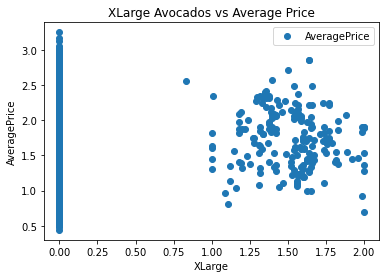

In [82]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df3.plot(x = 'XLarge', y='AveragePrice',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('XLarge Avocados vs Average Price')  
plt.xlabel('XLarge')  
plt.ylabel('AveragePrice')  
plt.show()

In [83]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df3['XLarge'].values.reshape(-1,1)
y = df3['AveragePrice'].values.reshape(-1,1)

In [84]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [86]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

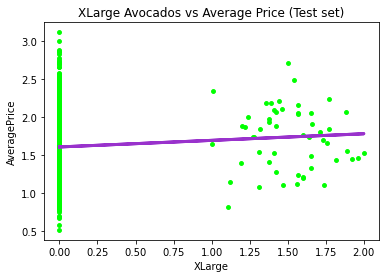

In [90]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='lime', s = 15)
plot_test.plot(X_test, y_predicted, color='darkorchid', linewidth =3)
plot_test.title('XLarge Avocados vs Average Price (Test set)')
plot_test.xlabel('XLarge')
plot_test.ylabel('AveragePrice')
plot_test.show()

In [91]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08712779]]
Mean squared error:  0.11526825098129506
R2 score:  0.002135529374377665
